In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings

In [112]:
ballygunge = pd.read_csv('C:/Users/shova/iCloudDrive/Kolkata_data/Work/Semi_processed/Ballygunge.csv')    # reads the Ballygunge file
ballygunge.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard
0,2019-08-30,15.36,26.35,23.30,12.31,1.84,0.37,24.52,30.56,29.12,Good
1,2019-08-31,14.78,29.30,19.09,15.00,2.61,0.33,25.19,29.72,29.30,Good
2,2019-09-01,22.12,42.97,25.03,10.62,2.23,0.48,22.21,28.83,42.97,Good
3,2019-09-02,10.06,21.85,24.25,31.03,1.91,0.42,19.23,29.02,30.31,Good
4,2019-09-03,8.43,15.31,22.70,35.45,2.89,0.39,22.00,28.63,28.38,Good


In [113]:
ballygunge['Date'] = pd.to_datetime(ballygunge['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
ballygunge["month"] = ballygunge["Date"].dt.month
ballygunge["week"] = ballygunge["Date"].dt.strftime('%V').astype('int64')
ballygunge["week_day"] = ballygunge["Date"].dt.weekday
ballygunge.head()

,Date,PM2.5,PM10,NO2,NH3,SO2,CO,Ozone,AT,AQI,AQI_Standard,month,week,week_day
0,2019-08-30,15.36,26.35,23.30,12.31,1.84,0.37,24.52,30.56,29.12,Good,8,35,4
1,2019-08-31,14.78,29.30,19.09,15.00,2.61,0.33,25.19,29.72,29.30,Good,8,35,5
2,2019-09-01,22.12,42.97,25.03,10.62,2.23,0.48,22.21,28.83,42.97,Good,9,35,6
3,2019-09-02,10.06,21.85,24.25,31.03,1.91,0.42,19.23,29.02,30.31,Good,9,36,0
4,2019-09-03,8.43,15.31,22.70,35.45,2.89,0.39,22.00,28.63,28.38,Good,9,36,1


In [114]:
ballygunge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1220 non-null   datetime64[ns]
 1   PM2.5         1220 non-null   float64       
 2   PM10          1220 non-null   float64       
 3   NO2           1220 non-null   float64       
 4   NH3           1220 non-null   float64       
 5   SO2           1220 non-null   float64       
 6   CO            1220 non-null   float64       
 7   Ozone         1220 non-null   float64       
 8   AT            1220 non-null   float64       
 9   AQI           1220 non-null   float64       
 10  AQI_Standard  1220 non-null   object        
 11  month         1220 non-null   int64         
 12  week          1220 non-null   int64         
 13  week_day      1220 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 133.6+ KB


## Support Vector Regression

In [115]:
model_svr = SVR(kernel = 'rbf', C=100,  epsilon=0.1)

### PM 2.5

In [116]:
data_pm25 = pd.DataFrame()
data_pm25["month"] = ballygunge["month"]
data_pm25["week"] = ballygunge["week"]
data_pm25["week_day"] = ballygunge["week_day"]
data_pm25["PM2.5"] = ballygunge["PM2.5"]
cols = data_pm25.columns
data_pm25.head()

,month,week,week_day,PM2.5
0,8,35,4,15.36
1,8,35,5,14.78
2,9,35,6,22.12
3,9,36,0,10.06
4,9,36,1,8.43


In [117]:
# shuffling the data set
data_pm25 = shuffle(data_pm25, random_state=1).reset_index(drop=True)
data_pm25.head()

,month,week,week_day,PM2.5
0,7,29,6,6.99
1,3,9,4,55.62
2,4,15,3,30.09
3,5,21,5,26.41
4,11,47,1,109.30


In [118]:
duplicate_pm25 = data_pm25.copy()

In [119]:
#normalizing the dataset
data_pm25 = preprocessing.normalize(data_pm25,norm='l2')
data_pm25 = pd.DataFrame(data_pm25, columns=cols)

In [120]:
X_pm25 = data_pm25.drop('PM2.5', axis=1) #data basically refere to the values in the independent columns
y_pm25 = data_pm25.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

In [122]:
ballygunge_pm25_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [123]:
predictions_pm25 = ballygunge_pm25_svr.predict(X_test)

In [124]:
r2 = r2_score(y_test, predictions_pm25)
print('r2 score for  model is', r2)

r2 score for  model is 0.9585671693469878


In [125]:
#RSME - Root Mean Square Error
predictions_pm25 = predictions_pm25.reshape(y_test.shape[0],1)
np.sqrt(((predictions_pm25 - y_test)**2).mean())

PM2.5    0.055452
dtype: float64

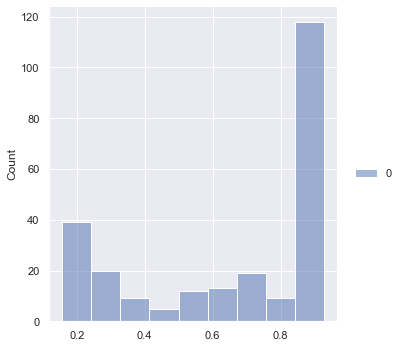

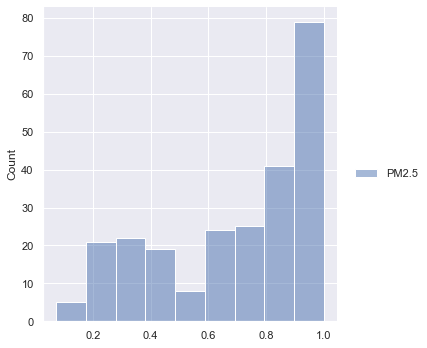

In [126]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm25)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

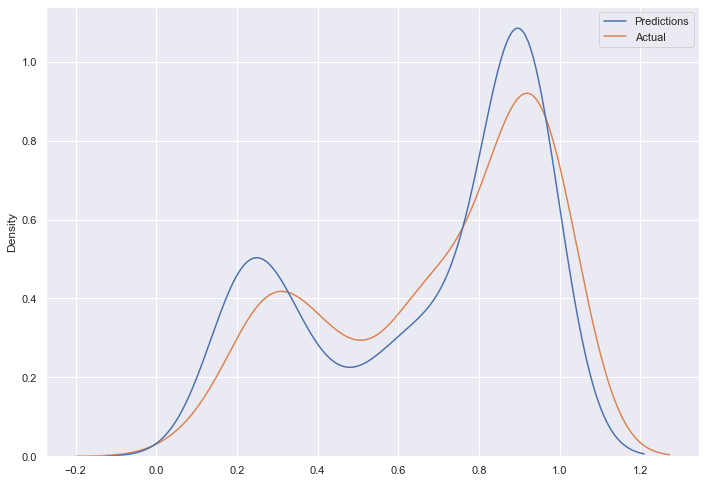

In [127]:
results = pd.DataFrame(predictions_pm25, columns = ['Predictions'])
results["Actual"] = list(y_test["PM2.5"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### PM10

In [128]:
data_pm10 = pd.DataFrame()
data_pm10["month"] = ballygunge["month"]
data_pm10["week"] = ballygunge["week"]
data_pm10["week_day"] = ballygunge["week_day"]
data_pm10["PM10"] = ballygunge["PM10"]
cols = data_pm10.columns
data_pm10.head()

,month,week,week_day,PM10
0,8,35,4,26.35
1,8,35,5,29.30
2,9,35,6,42.97
3,9,36,0,21.85
4,9,36,1,15.31


In [129]:
# shuffling the data set
data_pm10 = shuffle(data_pm10, random_state=1).reset_index(drop=True)
data_pm10.head()

,month,week,week_day,PM10
0,7,29,6,21.36
1,3,9,4,111.48
2,4,15,3,61.64
3,5,21,5,67.79
4,11,47,1,175.02


In [130]:
duplicate_pm10 = data_pm10.copy()

In [131]:
#normalizing the dataset
data_pm10 = preprocessing.normalize(data_pm10,norm='l2')
data_pm10 = pd.DataFrame(data_pm10, columns=cols)

In [132]:
X_pm10 = data_pm10.drop('PM10', axis=1) #data basically refere to the values in the independent columns
y_pm10 = data_pm10.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

In [134]:
ballygunge_pm10_model_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [135]:
predictions_pm10 = ballygunge_pm10_model_svr.predict(X_test)

In [136]:
r2 = r2_score(y_test, predictions_pm10)
print('r2 score for   model is', r2)

r2 score for   model is 0.6453460537651963


In [137]:
#RSME - Root Mean Square Error
predictions4 = predictions_pm10.reshape(y_test.shape[0],1)
np.sqrt(((predictions4 - y_test)**2).mean())

PM10    0.091575
dtype: float64

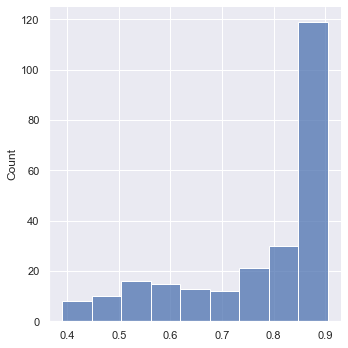

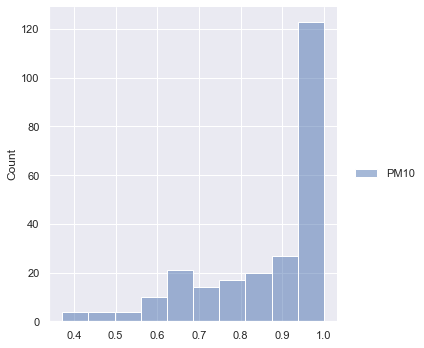

In [138]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_pm10)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

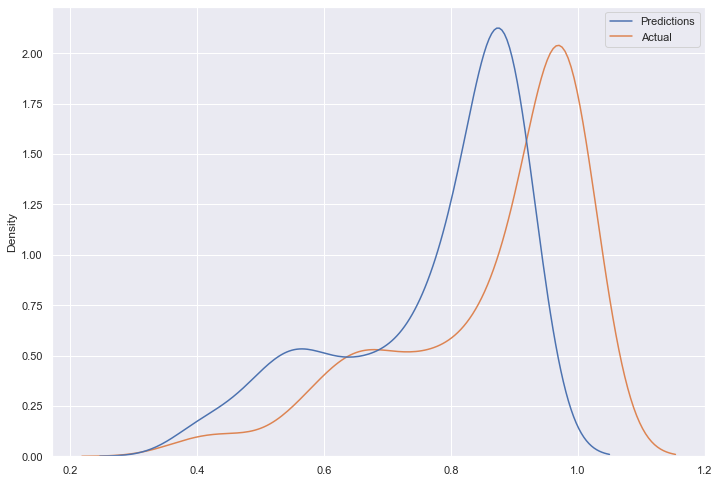

In [139]:
results = pd.DataFrame(predictions_pm10, columns = ['Predictions'])
results["Actual"] = list(y_test["PM10"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NO2

In [140]:
data_no2 = pd.DataFrame()
data_no2["month"] = ballygunge["month"]
data_no2["week"] = ballygunge["week"]
data_no2["week_day"] = ballygunge["week_day"]
data_no2["NO2"] = ballygunge["NO2"]
cols = data_no2.columns
data_no2.head()

,month,week,week_day,NO2
0,8,35,4,23.30
1,8,35,5,19.09
2,9,35,6,25.03
3,9,36,0,24.25
4,9,36,1,22.70


In [141]:
# shuffling the data set
data_no2=shuffle(data_no2, random_state=1).reset_index(drop=True)
data_no2.head()

,month,week,week_day,NO2
0,7,29,6,4.10
1,3,9,4,15.83
2,4,15,3,14.77
3,5,21,5,2.01
4,11,47,1,75.39


In [142]:
duplicate_no2 = data_no2.copy()

In [143]:
#normalizing the dataset
data_no2 = preprocessing.normalize(data_no2,norm='l2')
data_no2 = pd.DataFrame(data_no2, columns=cols)

In [144]:
X_no2 = data_no2.drop('NO2', axis=1) #data basically refere to the values in the independent columns
y_no2 = data_no2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_no2, y_no2, test_size=0.2, random_state=42)

In [146]:
ballygunge_no2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [147]:
predictions_no2 = ballygunge_no2_svr.predict(X_test)

In [148]:
r2 = r2_score(y_test, predictions_no2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9383215697985411


In [149]:
#RSME - Root Mean Square Error
predictions5 = predictions_no2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NO2    0.063072
dtype: float64

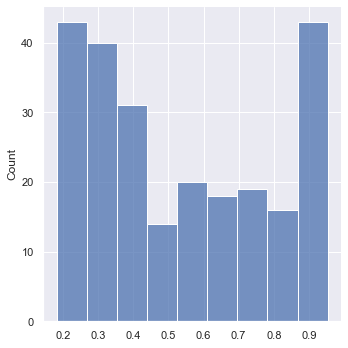

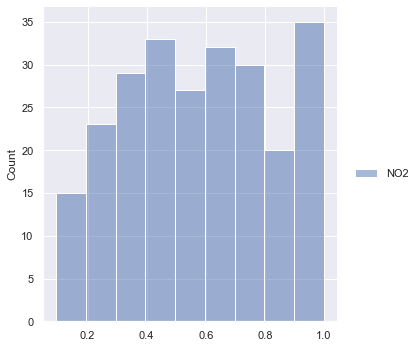

In [150]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_no2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

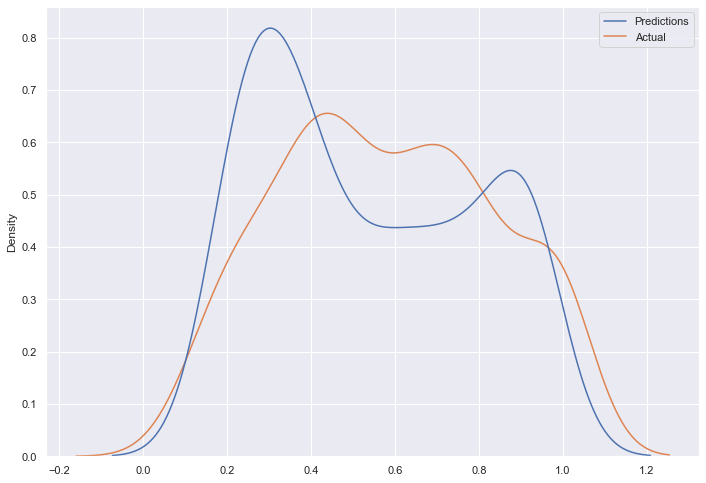

In [151]:
results = pd.DataFrame(predictions_no2, columns = ['Predictions'])
results["Actual"] = list(y_test["NO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### NH3

In [152]:
data_nh3 = pd.DataFrame()
data_nh3["month"] = ballygunge["month"]
data_nh3["week"] = ballygunge["week"]
data_nh3["week_day"] = ballygunge["week_day"]
data_nh3["NH3"] = ballygunge["NH3"]
cols = data_nh3.columns
data_nh3.head()

,month,week,week_day,NH3
0,8,35,4,12.31
1,8,35,5,15.00
2,9,35,6,10.62
3,9,36,0,31.03
4,9,36,1,35.45


In [153]:
# shuffling the data set
data_nh3 = shuffle(data_nh3, random_state=1).reset_index(drop=True)
data_nh3.head()

,month,week,week_day,NH3
0,7,29,6,7.21
1,3,9,4,21.05
2,4,15,3,21.68
3,5,21,5,2.87
4,11,47,1,53.96


In [154]:
duplicate_nh3 = data_nh3.copy()

In [155]:
#normalizing the dataset
data_nh3 = preprocessing.normalize(data_nh3,norm='l2')
data_nh3 = pd.DataFrame(data_nh3, columns=cols)

In [156]:
X_nh3 = data_nh3.drop('NH3', axis=1) #data basically refere to the values in the independent columns
y_nh3 = data_nh3.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_nh3, y_nh3, test_size=0.2, random_state=42)

In [158]:
ballygunge_nh3_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [159]:
predictions_nh3 = ballygunge_nh3_svr.predict(X_test)

In [160]:
r2 = r2_score(y_test, predictions_nh3)
print('r2 score for   model is', r2)

r2 score for   model is 0.9475434915496851


In [161]:
#RSME - Root Mean Square Error
predictions5 = predictions_nh3.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

NH3    0.063802
dtype: float64

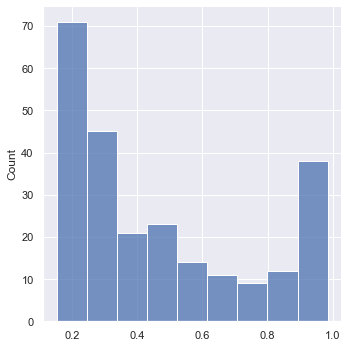

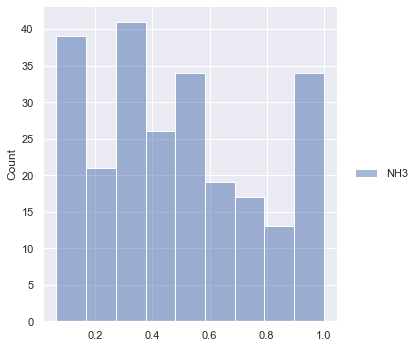

In [162]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_nh3)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

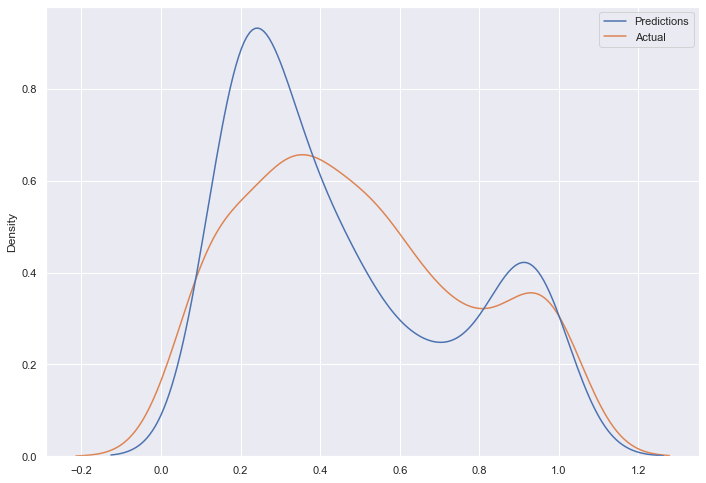

In [163]:
results = pd.DataFrame(predictions_nh3, columns = ['Predictions'])
results["Actual"] = list(y_test["NH3"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### SO2

In [164]:
data_so2 = pd.DataFrame()
data_so2["month"] = ballygunge["month"]
data_so2["week"] = ballygunge["week"]
data_so2["week_day"] = ballygunge["week_day"]
data_so2["SO2"] = ballygunge["SO2"]
cols = data_so2.columns
data_so2.head()

,month,week,week_day,SO2
0,8,35,4,1.84
1,8,35,5,2.61
2,9,35,6,2.23
3,9,36,0,1.91
4,9,36,1,2.89


In [165]:
# shuffling the data set
data_so2 = shuffle(data_so2, random_state=1).reset_index(drop=True)
data_so2.head()

,month,week,week_day,SO2
0,7,29,6,9.50
1,3,9,4,10.56
2,4,15,3,5.29
3,5,21,5,2.43
4,11,47,1,18.07


In [166]:
duplicate_so2 = data_so2.copy()

In [167]:
#normalizing the dataset
data_so2 = preprocessing.normalize(data_so2,norm='l2')
data_so2 = pd.DataFrame(data_so2, columns=cols)

In [168]:
X_so2 = data_so2.drop('SO2', axis=1) #data basically refere to the values in the independent columns
y_so2 = data_so2.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_so2, y_so2, test_size=0.2, random_state=42)

In [170]:
ballygunge_so2_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [171]:
predictions_so2 = ballygunge_so2_svr.predict(X_test)

In [172]:
r2 = r2_score(y_test, predictions_so2)
print('r2 score for   model is', r2)

r2 score for   model is 0.9539090373477501


In [173]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

SO2    0.057328
dtype: float64

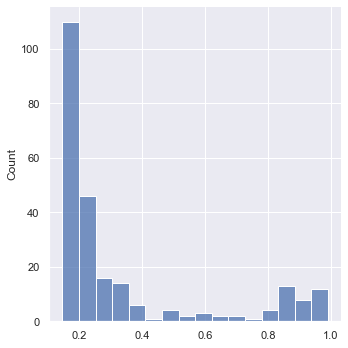

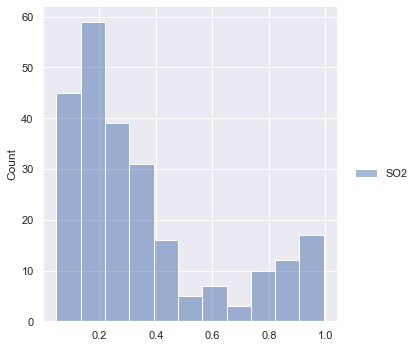

In [174]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_so2)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

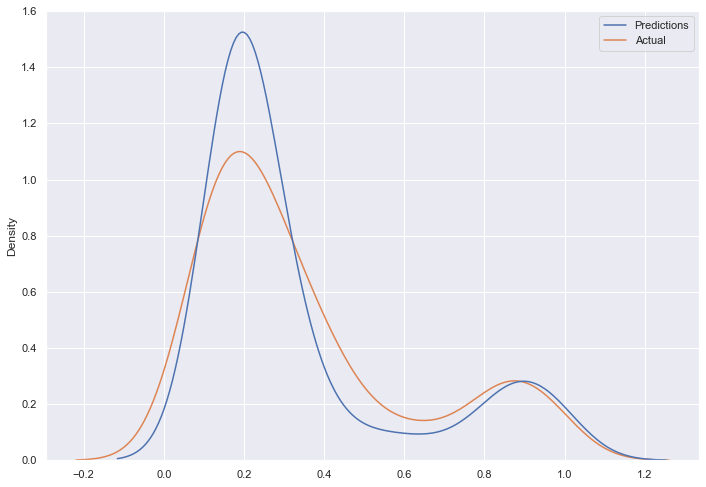

In [175]:
results = pd.DataFrame(predictions_so2, columns = ['Predictions'])
results["Actual"] = list(y_test["SO2"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### CO

In [176]:
data_co = pd.DataFrame()
data_co["month"] = ballygunge["month"]
data_co["week"] = ballygunge["week"]
data_co["week_day"] = ballygunge["week_day"]
data_co["CO"] = ballygunge["CO"]
cols = data_co.columns
data_co.head()

,month,week,week_day,CO
0,8,35,4,0.37
1,8,35,5,0.33
2,9,35,6,0.48
3,9,36,0,0.42
4,9,36,1,0.39


In [177]:
# shuffling the data set
data_co = shuffle(data_co, random_state=1).reset_index(drop=True)
data_co.head()

,month,week,week_day,CO
0,7,29,6,0.05
1,3,9,4,0.49
2,4,15,3,0.38
3,5,21,5,0.19
4,11,47,1,1.38


In [178]:
duplicate_co = data_co.copy()

In [179]:
'''#normalizing the dataset
data_co = preprocessing.normalize(data_co,norm='l2')
data_co = pd.DataFrame(data_co, columns=cols)''' 
# Normalization is not working properly in terms of carbon monoxide

"#normalizing the dataset\ndata_co = preprocessing.normalize(data_co,norm='l2')\ndata_co = pd.DataFrame(data_co, columns=cols)"

In [180]:
X_co = data_co.drop('CO', axis=1) #data basically refere to the values in the independent columns
y_co = data_co.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_co, y_co, test_size=0.2, random_state=42)

In [182]:
ballygunge_co_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [183]:
predictions_co = ballygunge_co_svr.predict(X_test)

In [184]:
r2 = r2_score(y_test, predictions_co)
print('r2 score for   model is', r2)

r2 score for   model is 0.6237637949864341


In [185]:
#RSME - Root Mean Square Error
predictions5 = predictions_so2.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

CO    0.498957
dtype: float64

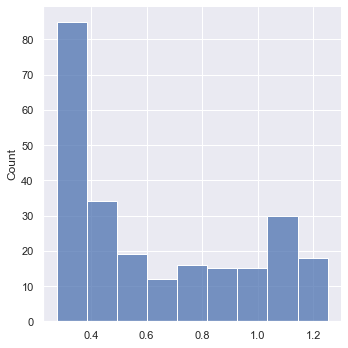

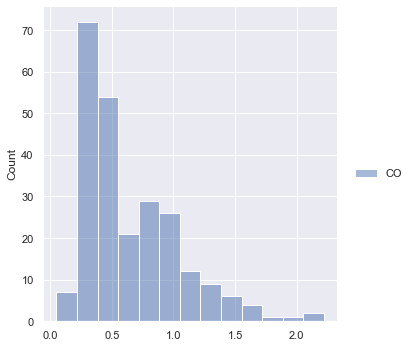

In [186]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_co)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

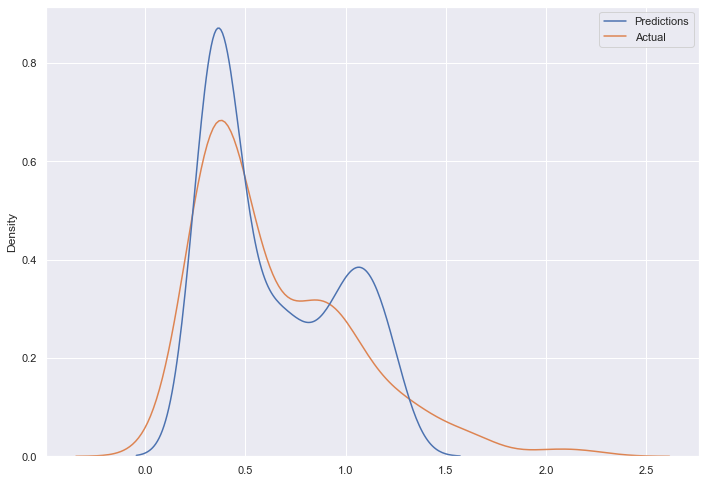

In [187]:
results = pd.DataFrame(predictions_co, columns = ['Predictions'])
results["Actual"] = list(y_test["CO"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Ozone

In [188]:
data_ozone = pd.DataFrame()
data_ozone["month"] = ballygunge["month"]
data_ozone["week"] = ballygunge["week"]
data_ozone["week_day"] = ballygunge["week_day"]
data_ozone["Ozone"] = ballygunge["Ozone"]
cols = data_ozone.columns
data_ozone.head()

,month,week,week_day,Ozone
0,8,35,4,24.52
1,8,35,5,25.19
2,9,35,6,22.21
3,9,36,0,19.23
4,9,36,1,22.00


In [189]:
# shuffling the data set
data_ozone = shuffle(data_ozone, random_state=1).reset_index(drop=True)
data_ozone.head()

,month,week,week_day,Ozone
0,7,29,6,30.90
1,3,9,4,61.34
2,4,15,3,12.06
3,5,21,5,33.75
4,11,47,1,60.93


In [190]:
duplicate_ozone = data_ozone.copy()

In [191]:
#normalizing the dataset
data_ozone = preprocessing.normalize(data_ozone,norm='l2')
data_ozone = pd.DataFrame(data_ozone, columns=cols)

In [192]:
X_o3 = data_ozone.drop('Ozone', axis=1) #data basically refere to the values in the independent columns
y_o3 = data_ozone.drop('month', axis=1).drop('week', axis=1).drop('week_day', axis=1)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X_o3, y_o3, test_size=0.2, random_state=42)

In [194]:
ballygunge_ozone_svr = model_svr.fit(X_train, np.ravel(y_train,order='C'))

In [195]:
predictions_ozone = ballygunge_ozone_svr.predict(X_test)

In [196]:
r2 = r2_score(y_test, predictions_ozone)
print('r2 score for   model is', r2)

r2 score for   model is 0.9303935874032737


In [197]:
#RSME - Root Mean Square Error
predictions5 = predictions_ozone.reshape(y_test.shape[0],1)
np.sqrt(((predictions5 - y_test)**2).mean())

Ozone    0.053869
dtype: float64

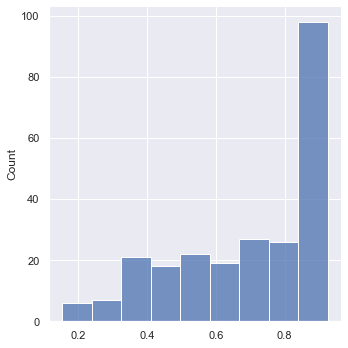

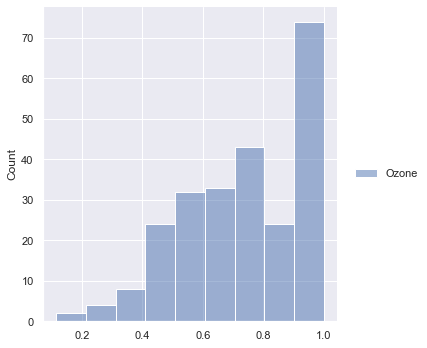

In [198]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data = predictions_ozone)
sns.displot(data = y_test)

<AxesSubplot: ylabel='Density'>

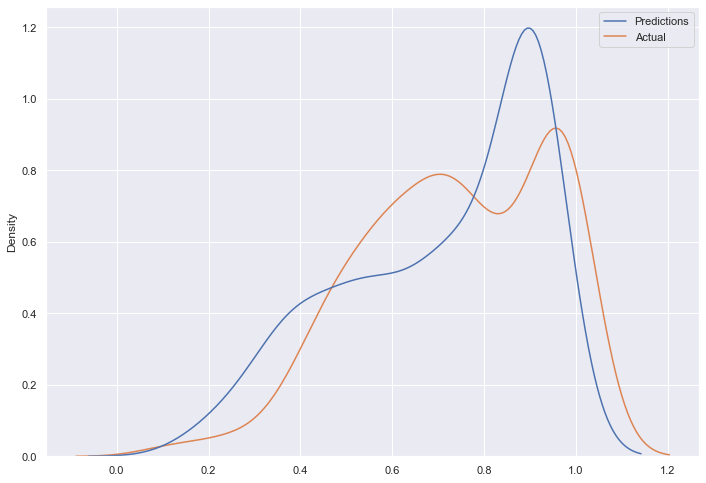

In [199]:
results = pd.DataFrame(predictions_ozone, columns = ['Predictions'])
results["Actual"] = list(y_test["Ozone"])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=results)

### Prediction Functions

In [200]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

##2. PM10 Sub-Index calculation
def PM10(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

##3. NO2 Sub-Index calculation
def NO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0


##4. NH3 Sub-Index calculation
def NH3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

##5. SO2 Sub-Index calculation
def SO2(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

##6. CO Sub-Index calculation
def CO(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

##7. O3 Sub-Index calculation
def O3(x):
    if x == "" or x == "NA" or x == "None":
        return 0
    x = float(x)
    
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

In [201]:
def aqi(l):
    final = max(PM25(l[0]),PM10(l[1]),NO2(l[2]),NH3(l[3]),SO2(l[4]),CO(l[5]),O3(l[6]))
    if final >=0 and final<=50:
        return([round(final,2),"Good"])
    elif final>50 and final<=100:
        return([round(final,2),"Satisfactory"])
    elif final>100 and final<= 200:
        return([round(final,2),"Moderately Polluted"])
    elif final>200 and final<=300:
        return([round(final,2),"Poor"])
    elif final>300 and final<=400:
        return([round(final,2),"Very poor"])
    elif final>400:
        return([round(final,2),"Severe"])

In [202]:
def predictor_pm25(query, model_pm25,data_pm25,X):
    results = [] 
    location = data_pm25.loc[(data_pm25['month'] == query[0]) & (data_pm25['week'] == query[1]) & (data_pm25['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm25.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm25.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_pm10(query, model_pm10,data_pm10,X):
    results = [] 
    location = data_pm10.loc[(data_pm10['month'] == query[0]) & (data_pm10['week'] == query[1]) & (data_pm10['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_pm10.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_pm10.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_no2(query, model_no2, data_no2,X):
    results = []
    location = data_no2.loc[(data_no2['month'] == query[0]) & (data_no2['week'] == query[1]) & (data_no2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_no2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_no2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_nh3(query, model_nh3, data_nh3,X):
    results = [] 
    location = data_nh3.loc[(data_nh3['month'] == query[0]) & (data_nh3['week'] == query[1]) & (data_nh3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_nh3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_nh3.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_so2(query, model_so2,data_so2,X):
    results = [] 
    location = data_so2.loc[(data_so2['month'] == query[0]) & (data_so2['week'] == query[1]) & (data_so2['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_so2.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_so2.loc[l]**2)))
    return(sum(results) / len(results))

def predictor_co(query, model_co,data_co,X):
    results = [] 
    location = data_co.loc[(data_co['month'] == query[0]) & (data_co['week'] == query[1]) & (data_co['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_co.predict(np.array(query).reshape(1,-1)))
    return(sum(results) / len(results))

def predictor_o3(query, model_o3,data_o3,X):
    results = []
    location = data_o3.loc[(data_o3['month'] == query[0]) & (data_o3['week'] == query[1]) & (data_o3['week_day'] == query[2])].index
    for l in list(location):
        results.append(model_o3.predict(X.iloc[l].to_numpy().reshape(1,-1))* np.sqrt(sum(data_o3.loc[l]**2)))
    return(sum(results) / len(results))

In [203]:
def precal(date, model_pm25,model_pm10,model_no2,model_nh3,model_so2,model_co,model_o3,data_pm25,data_pm10,data_no2, data_nh3,data_so2,data_co,data_o3,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3):
    query = []
    result = []
    date = pd.DataFrame(date)
    date[0] = pd.to_datetime(date[0],format="%Y-%m-%d")
    query.append(list(date[0].dt.month)[0])
    query.append(list(date[0].dt.strftime('%V').astype('int64'))[0])
    query.append(list(date[0].dt.weekday)[0])
    result.append(predictor_pm25(query,model_pm25, data_pm25,X_pm25))
    result.append(predictor_pm10(query,model_pm10, data_pm10,X_pm10))
    result.append(predictor_no2(query,model_no2, data_no2,X_no2))
    result.append(predictor_nh3(query,model_nh3, data_nh3,X_nh3))
    result.append(predictor_so2(query,model_so2, data_so2,X_so2))
    result.append(predictor_co(query,model_co, data_co,X_co))
    result.append(predictor_o3(query,model_o3, data_o3,X_o3))
    ans = aqi(result)
    print("Expected:-\nPM 2.5: " + str(result[0])+"\nPM 10: " + str(result[1])+"\nNO2: " + str(result[2])+"\nNH3: " + str(result[3])+"\nSO2: " + str(result[4])+"\nCO: " + str(result[5])+"\nO3: " + str(result[6]))
    print("\nThe AQI value is expected to be around " + str(ans[0]) + " and the index is expected to be " + ans[1])
    

In [204]:
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.filterwarnings(action='ignore', category=UserWarning) # setting ignore as a parameter and further adding category
precal(["2019-08-30"],ballygunge_pm25_svr,ballygunge_pm10_model_svr,ballygunge_no2_svr,ballygunge_nh3_svr,ballygunge_so2_svr,ballygunge_co_svr,ballygunge_ozone_svr,duplicate_pm25,duplicate_pm10,duplicate_no2,duplicate_nh3,duplicate_so2,duplicate_co,duplicate_ozone,X_pm25,X_pm10,X_no2,X_nh3,X_so2,X_co,X_o3)

Expected:-
PM 2.5: [8.52271545]
PM 10: [27.08059062]
NO2: [12.96733964]
NH3: [7.42643584]
SO2: [5.23109201]
CO: [0.58982747]
O3: [25.47889955]

The AQI value is expected to be around 29.49 and the index is expected to be Good
